## Bias and variance

In [24]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import learning_curve, train_test_split, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

%matplotlib inline

In [25]:
data = sio.loadmat('data/ml-ex5/ex5data1.mat')

In [26]:
X_train_0 = data['X']
y_train_0 = data['y']

X_cval_0 = data['Xval']
y_cval_0 = data['yval']

X_test_0 = data['Xtest']
y_test_0 = data['ytest']

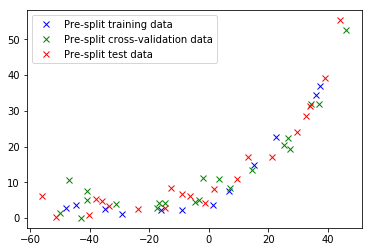

In [27]:
plt.plot(X_train_0, y_train_0, 'bx', label='Pre-split training data')
plt.plot(X_cval_0, y_cval_0, 'gx', label='Pre-split cross-validation data')
plt.plot(X_test_0, y_test_0, 'rx', label='Pre-split test data')
plt.legend()

In [28]:
X_train_0.shape[0]

12

In [29]:
X_cval_0.shape[0]

21

In [30]:
X_test_0.shape[0]

21

In [31]:
# Concatenate all data and use sklearn utilities for spliting data
X = np.concatenate([X_train_0, X_cval_0, X_test_0])
y = np.concatenate([y_train_0, y_cval_0, y_test_0]).ravel()

In [32]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=21, random_state=42)

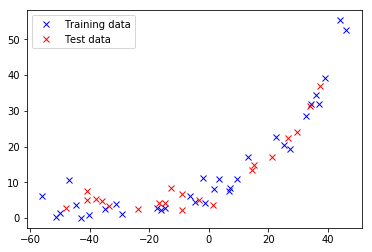

In [33]:
plt.plot(X_train, y_train, 'bx', label='Training data')
plt.plot(X_test, y_test, 'rx', label='Test data')
plt.legend()

In [34]:
def plot_training_and_prediction_data(X_train, y_train, X_pred, y_pred, title=''):
    plt.plot(X_train, y_train, 'bx', label='Training data')
    plt.plot(X_pred, y_pred, 'b--', label='Prediction')
    plt.xlabel('Change in water level')
    plt.ylabel('Water flowing out of the dam')
    plt.title(title)
    plt.legend()

### Linear Regression

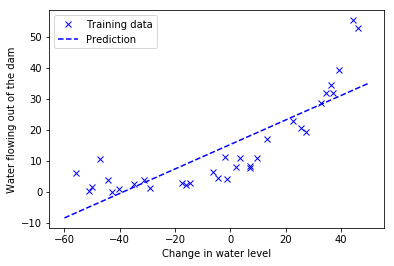

In [35]:
# Linear regression with default regularization strength (alpha=1)
lreg_lin = Ridge(alpha=1.0)
lreg_lin.fit(X_train, y_train)

X_pred = np.array([[-60], [50]])
y_pred = lreg_lin.predict(X_pred)

plot_training_and_prediction_data(X_train, y_train, X_pred, y_pred)

### Polynomial regression

In [36]:
# Support for polynomial features and scaling
poly = PolynomialFeatures(degree=8)
scaler = StandardScaler()

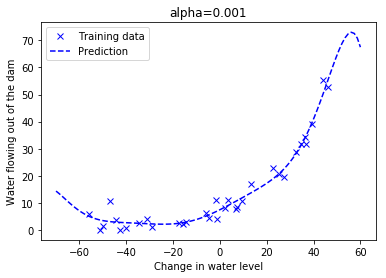

In [37]:
# Polynomial regression with with regularization (alpha=0.001)
lreg_poly_0 = Pipeline(steps=[('poly', poly), ('scaler', scaler), ('lreg', Ridge(alpha=0.001))])
lreg_poly_0.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = lreg_poly_0.predict(X_pred)

plot_training_and_prediction_data(X_train, y_train, X_pred, y_pred, 'alpha=0.001')

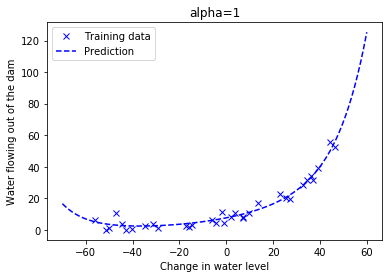

In [38]:
# Polynomial regression with with regularization alpha=1
lreg_poly_1 = Pipeline(steps=[('poly', poly), ('scaler', scaler), ('lreg', Ridge(alpha=1))])
lreg_poly_1.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = lreg_poly_1.predict(X_pred)

plot_training_and_prediction_data(X_train, y_train, X_pred, y_pred, 'alpha=1')

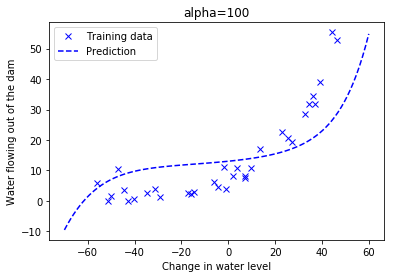

In [39]:
# Polynomial regression with with regularization alpha=100
lreg_poly_100 = Pipeline(steps=[('poly', poly), ('scaler', scaler), ('lreg', Ridge(alpha=100))])
lreg_poly_100.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = lreg_poly_100.predict(X_pred)

plot_training_and_prediction_data(X_train, y_train, X_pred, y_pred, 'alpha=100')

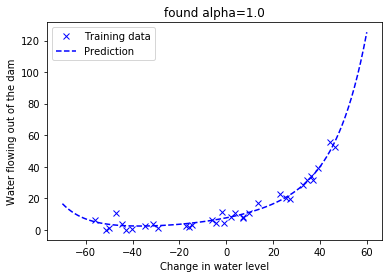

In [40]:
# Polynomial regression with with regularization parameter found by sklearn

# Search space for alpha
alphas=[0.001, 0.003, 0.01, 0.03, 0.1, 0.8, 1, 3, 10]

lreg_poly_opt = Pipeline(steps=[('poly', poly), ('scaler', scaler), ('lreg', RidgeCV(alphas=alphas))])
lreg_poly_opt.fit(X_train, y_train)

X_pred = np.linspace(-70, 60, 100).reshape(-1,1)
y_pred = lreg_poly_opt.predict(X_pred)

alpha = lreg_poly_opt.named_steps['lreg'].alpha_

plot_training_and_prediction_data(X_train, y_train, X_pred, y_pred, f'found alpha={alpha}')

### Learning curves

In [41]:
def compute_learning_curves(regressor, X_train, y_train, cv_size):
    # Train/CV split using cv_size examples
    cv = ShuffleSplit(n_splits=50, test_size=cv_size, random_state=0)
    # Relative training set sizes
    train_sizes_rel = np.linspace(.1, 1.0, 10)
    # Generate learning curves
    train_sizes, train_scores, cv_scores = learning_curve(regressor, X_train, y_train, cv=cv, train_sizes=train_sizes_rel)
    # Return training set sizes and average learning values
    return [train_sizes, np.mean(train_scores, axis=1), np.mean(cv_scores, axis=1)]

def plot_learning_curves(train_sizes, train_scores, cv_scores, y_min=-1, y_max=1, title=''):
    plt.plot(train_sizes, train_scores, 'b-', label='Training score')
    plt.plot(train_sizes, cv_scores, 'g-', label='CV score')

    plt.grid(True, axis='y')
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.xlim(xmin=1)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.legend()

Learning curve for linear regression:

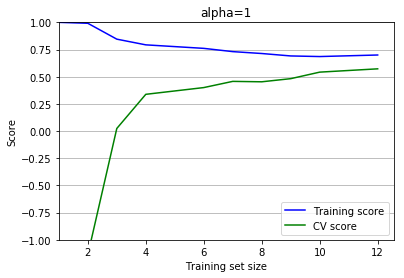

In [42]:
plot_learning_curves(*compute_learning_curves(lreg_lin, X_train, y_train, cv_size=21), title='alpha=1')

Learning curves for polynomial regression:

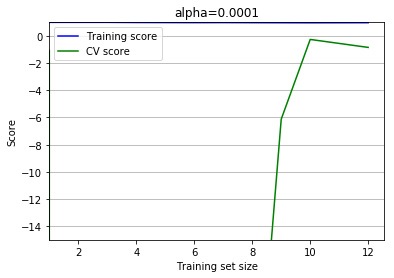

In [43]:
plot_learning_curves(*compute_learning_curves(lreg_poly_0, X_train, y_train, cv_size=21), y_min=-15, title='alpha=0.0001')

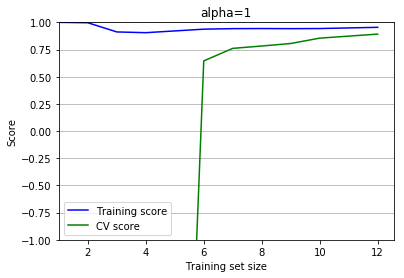

In [44]:
plot_learning_curves(*compute_learning_curves(lreg_poly_1, X_train, y_train, cv_size=21), title='alpha=1')

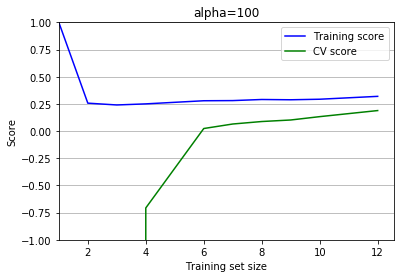

In [45]:
plot_learning_curves(*compute_learning_curves(lreg_poly_100, X_train, y_train, cv_size=21), title='alpha=100')